In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from numpy import inf

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = "{:,.2f}".format
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

In [4]:
test_df = pd.read_csv('test.csv')
test_df_indeces = test_df.PassengerId

In [5]:
test_df = test_df.drop('PassengerId', axis=1)

In [6]:
test_numerical_data = test_df.select_dtypes(['int64', 'float64'])
test_categorical_data = test_df.select_dtypes(['object'])

In [7]:
test_categorical_data.head()

Name     Sex   Ticket Cabin  \
0                              Kelly, Mr. James    male   330911   NaN   
1              Wilkes, Mrs. James (Ellen Needs)  female   363272   NaN   
2                     Myles, Mr. Thomas Francis    male   240276   NaN   
3                              Wirz, Mr. Albert    male   315154   NaN   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  3101298   NaN   

  Embarked  
0        Q  
1        S  
2        Q  
3        S  
4        S

In [8]:
test_numerical_data.head()

Pclass   Age  SibSp  Parch  Fare
0       3 34.50      0      0  7.83
1       3 47.00      1      0  7.00
2       2 62.00      0      0  9.69
3       3 27.00      0      0  8.66
4       3 22.00      1      1 12.29

In [9]:
df = pd.read_csv('train.csv')
df_indeces = df.PassengerId

In [10]:
df.shape

(891, 12)

In [11]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male 22.00      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.00      1   
2                             Heikkinen, Miss. Laina  female 26.00      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.00      1   
4                           Allen, Mr. William Henry    male 35.00      0   

   Parch            Ticket  Fare Cabin Embarked  
0      0         A/5 21171  7.25   NaN        S  
1      0          PC 17599 71.28   C85        C  
2      0  STON/O2. 3101282  7.92   NaN        S  
3      0            113803 53.10  C123        S  
4      0            373450  8.05   NaN        S

In [12]:
numerical_data = df.drop(['Survived', 'PassengerId'], axis=1).select_dtypes(['int64', 'float64'])
categorical_data = df.select_dtypes(['object'])

In [13]:
numerical_data.head()

Pclass   Age  SibSp  Parch  Fare
0       3 22.00      1      0  7.25
1       1 38.00      1      0 71.28
2       3 26.00      0      0  7.92
3       1 35.00      1      0 53.10
4       3 35.00      0      0  8.05

In [14]:
categorical_data.head()

Name     Sex  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                           Allen, Mr. William Henry    male   

             Ticket Cabin Embarked  
0         A/5 21171   NaN        S  
1          PC 17599   C85        C  
2  STON/O2. 3101282   NaN        S  
3            113803  C123        S  
4            373450   NaN        S

In [15]:
print(categorical_data.shape, numerical_data.shape)

(891, 5) (891, 5)


In [16]:
numerical_data.describe()

Pclass    Age  SibSp  Parch   Fare
count  891.00 714.00 891.00 891.00 891.00
mean     2.31  29.70   0.52   0.38  32.20
std      0.84  14.53   1.10   0.81  49.69
min      1.00   0.42   0.00   0.00   0.00
25%      2.00  20.12   0.00   0.00   7.91
50%      3.00  28.00   0.00   0.00  14.45
75%      3.00  38.00   1.00   0.00  31.00
max      3.00  80.00   8.00   6.00 512.33

# Numerical data. EDA 

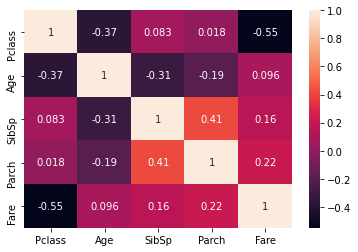

In [17]:
corr = numerical_data.corr()
sns.heatmap(corr, annot=True);

In [18]:
std = StandardScaler()
std_numerical_data = pd.DataFrame(std.fit_transform(numerical_data), columns=numerical_data.columns)

In [19]:
std_numerical_data.head()

Pclass   Age  SibSp  Parch  Fare
0    0.83 -0.53   0.43  -0.47 -0.50
1   -1.57  0.57   0.43  -0.47  0.79
2    0.83 -0.25  -0.47  -0.47 -0.49
3   -1.57  0.37   0.43  -0.47  0.42
4    0.83  0.37  -0.47  -0.47 -0.49

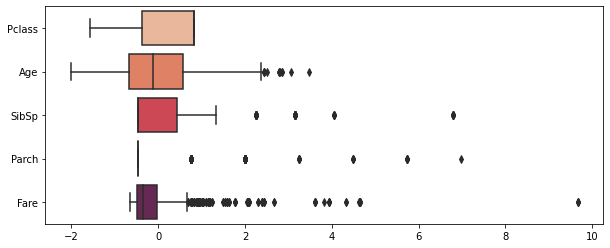

In [20]:
plt.figure(figsize=(10, 4))
sns.set_palette(sns.color_palette("rocket_r"))
sns.boxplot(data=std_numerical_data, orient='horizontal');

There is a problem with outliers.

**Generaly there are three options to handle outliers:** 

1. Remove them. 
2. Add additional feature that indicates whether records has outliers. 
3. Use log to dicrease the influence of.

### Missing values

In [21]:
numerical_data.isna().sum()

Pclass      0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [22]:
imputer = SimpleImputer(strategy='median')

In [23]:
filled_numerical_data = pd.DataFrame(imputer.fit_transform(numerical_data), columns=numerical_data.columns)

In [24]:
filled_numerical_data.shape

(891, 5)

In [25]:
filled_numerical_data.isna().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

### Age feature analysis

In [26]:
age_attribute = numerical_data.Age

In [27]:
age_attribute.head()

0   22.00
1   38.00
2   26.00
3   35.00
4   35.00
Name: Age, dtype: float64

In [28]:
age_attribute.describe()

count   714.00
mean     29.70
std      14.53
min       0.42
25%      20.12
50%      28.00
75%      38.00
max      80.00
Name: Age, dtype: float64

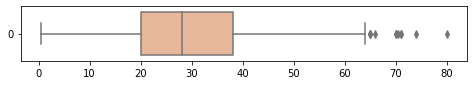

In [29]:
sns.set_palette(sns.color_palette("rocket_r"))
plt.figure(figsize=(8, 1))
sns.boxplot(data=age_attribute, orient='horizontal');

There are some outliers. I think the best solution will be to use IQR * 1.5 to manage them.

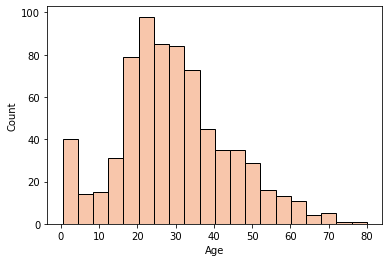

In [30]:
sns.histplot(age_attribute);

In [31]:
k2_score, pvalue = stats.normaltest(age_attribute.fillna(age_attribute.median()))

This function tests the null hypothesis that a sample comes from a normal distribution. 

In [32]:
alpha = 0.05

In [33]:
print(k2_score, pvalue)

53.46581133311897 2.454972229498001e-12


In [34]:
if pvalue < alpha:
    print("The null hypothesis can be rejected. We can assume that this data isn't normaly distributed.")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected. We can assume that this data isn't normaly distributed.


The age data distributed pretty close to normal distribution so I can assume that if we get rid of outliers it will be normaly distributed

In [35]:
IQR = age_attribute.quantile(0.75) - age_attribute.quantile(0.25)

In [36]:
threshold = IQR * 1.5

In [37]:
lower_bound = age_attribute.quantile(0.25) - threshold
upper_bound = age_attribute.quantile(0.75) + threshold
age_attribute_without_outliers = age_attribute[(age_attribute > lower_bound) & (age_attribute < upper_bound)]

In [38]:
print(age_attribute.shape, age_attribute_without_outliers.shape)

(891,) (703,)


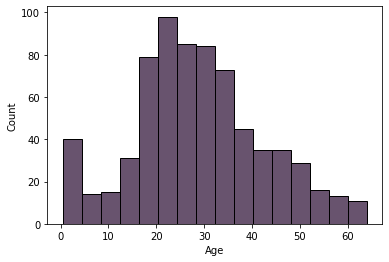

In [39]:
sns.set_palette(sns.color_palette("rocket"))
sns.histplot(age_attribute_without_outliers);

In [40]:
def check_normal_distribution(data):
    k2_score, pvalue = stats.normaltest(data.fillna(data.median()))
    alpha = 0.05
    
    print('Alpha level: ' + str(alpha))
    if pvalue < alpha:
        print("The null hypothesis can be rejected. We can assume that this data isn't normaly distributed.")
    else:
        print("The null hypothesis cannot be rejected. The data is normaly distributed")

In [41]:
check_normal_distribution(age_attribute_without_outliers)

Alpha level: 0.05
The null hypothesis cannot be rejected. The data is normaly distributed


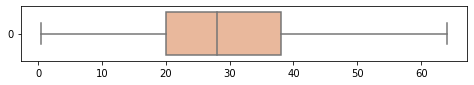

In [42]:
sns.set_palette(sns.color_palette("rocket_r"))
plt.figure(figsize=(8, 1))
sns.boxplot(data=age_attribute_without_outliers, orient='horizontal');

In [43]:
age_attribute.shape[0] - age_attribute_without_outliers.shape[0]

188

Using first strategy we lose a lot of data. So it will be better to use second or third stategy

### Pclass feature analysis

In [44]:
pclass_attribute = numerical_data.Pclass

In [45]:
pclass_attribute.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [46]:
pclass_attribute.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

I would say that is categorical ordered data, because it represents ticket class (1 - Upper, 2 - Middle, 3 - Lower)

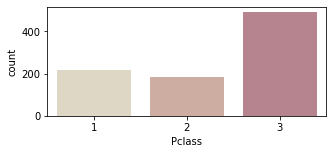

In [47]:
plt.figure(figsize=(5, 2))
sns.set_palette(sns.color_palette("ch:s=-.2,r=.6"))
sns.countplot(x=pclass_attribute);

### SibSp feature analysis

Number of siblings / spouses aboard the Titanic

In [48]:
sib_sp_attribute = numerical_data.SibSp

In [49]:
sib_sp_attribute.head()

0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64

In [50]:
sib_sp_attribute.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

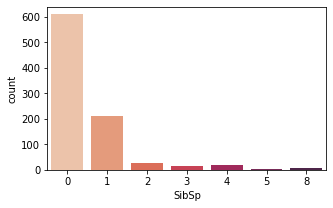

In [51]:
plt.figure(figsize=(5, 3))
sns.set_palette(sns.color_palette("rocket_r", n_colors=8))
sns.countplot(x=sib_sp_attribute);

In [52]:
Q3 = sib_sp_attribute.quantile(0.75)
Q1 = sib_sp_attribute.quantile(0.25)
IQR = Q3 - Q1
IQR

1.0

In [53]:
lower_bound = Q1 - IQR * 1.5
upper_bound = Q3 + IQR * 1.5

In [54]:
sib_sp_attribute.shape

(891,)

In [55]:
sib_sp_attribute_without_outliers = sib_sp_attribute[(sib_sp_attribute > lower_bound) & (sib_sp_attribute < upper_bound)]

In [56]:
loss = sib_sp_attribute.shape[0] - sib_sp_attribute_without_outliers.shape[0]
loss

46

In [57]:
upper_bound

2.5

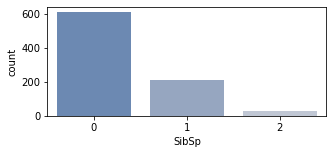

In [58]:
plt.figure(figsize=(5, 2))
sns.set_palette(sns.color_palette("vlag", 8))
sns.countplot(x=sib_sp_attribute_without_outliers);

I will add new feature which will indicate whether it is outlier or not

### Parch 

Number of parents / children aboard the Titanic

In [59]:
parch_attribute = numerical_data.Parch

In [60]:
parch_attribute.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

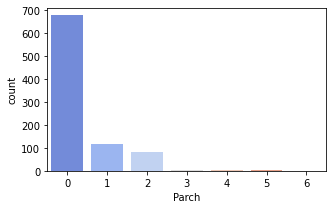

In [61]:
plt.figure(figsize=(5, 3))
sns.set_palette(sns.color_palette("coolwarm", 7))
sns.countplot(x=parch_attribute);

In [62]:
Q3 = parch_attribute.quantile(0.75)
Q1 = parch_attribute.quantile(0.25)
IQR = Q3 - Q1
IQR

0.0

### Fare feature analysis

Passenger fare

In [63]:
fare_attribute = numerical_data.Fare

In [64]:
fare_attribute.head()

0    7.25
1   71.28
2    7.92
3   53.10
4    8.05
Name: Fare, dtype: float64

In [65]:
fare_attribute.describe()

count   891.00
mean     32.20
std      49.69
min       0.00
25%       7.91
50%      14.45
75%      31.00
max     512.33
Name: Fare, dtype: float64

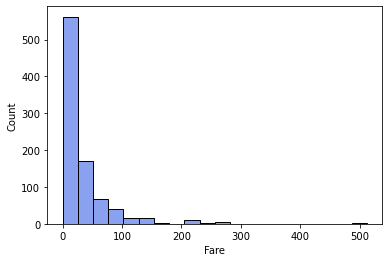

In [66]:
sns.set_palette(sns.color_palette("coolwarm", 7))
sns.histplot(fare_attribute, bins=20);

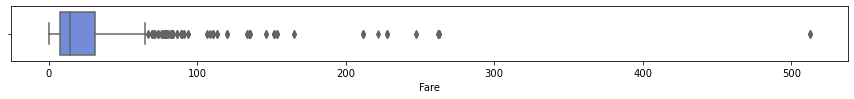

In [67]:
plt.figure(figsize=(15, 1))
sns.boxplot(x=fare_attribute);

In [68]:
def get_outliers_boundaries(data):
    Q3 = data.quantile(0.75)
    Q1 = data.quantile(0.25)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - IQR * 1.5
    upper_bound = Q3 + IQR * 1.5
    
    return lower_bound, upper_bound

In [69]:
lower_bound, upper_bound = get_outliers_boundaries(fare_attribute)

In [70]:
print(lower_bound, upper_bound)

-26.724 65.6344


In [71]:
fare_attribute_without_outliers = fare_attribute[(fare_attribute > lower_bound) & (fare_attribute < upper_bound)]

In [72]:
loss = fare_attribute.shape[0] - fare_attribute_without_outliers.shape[0]

In [73]:
loss

116

There is a big part of outliers in this series. I can't just remove them, so I'm going to use 2 or 3 strategy (additional attribute or put it under the log).

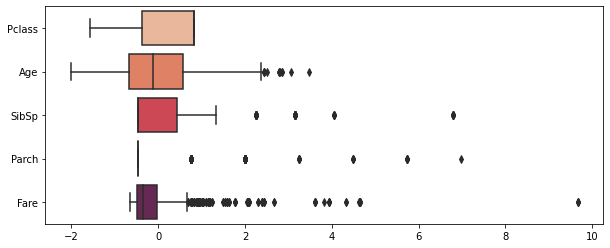

In [74]:
plt.figure(figsize=(10, 4))
sns.set_palette(sns.color_palette("rocket_r"))
sns.boxplot(data=std_numerical_data, orient='horizontal');

## Clustering numerical data using t-SNE

In [75]:
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(numerical_data.fillna(age_attribute.median()))

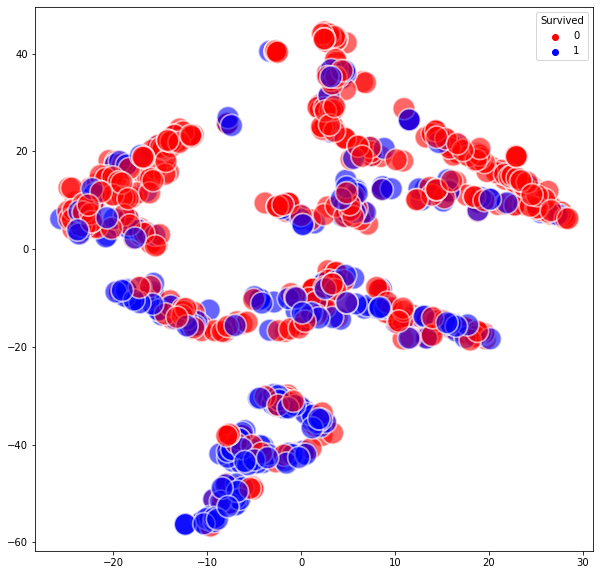

In [76]:
plt.figure(figsize=(10, 10))
sns.set_palette(sns.color_palette(['red', 'blue']))
sns.scatterplot(x=tsne_representation[:, 0], y=tsne_representation[:, 1], alpha=0.6, s=500, hue=df.Survived);

There are for sure some clusters, so I can use them to create a custom attribute which will define the cluster number and hopefully will improme the classification accuracy

## Feature Engineering using clustering

In [77]:
kmeans = KMeans(3)
kmeans.fit(filled_numerical_data.to_numpy())

KMeans(n_clusters=3)

In [78]:
filled_numerical_data.head()

Pclass   Age  SibSp  Parch  Fare
0    3.00 22.00   1.00   0.00  7.25
1    1.00 38.00   1.00   0.00 71.28
2    3.00 26.00   0.00   0.00  7.92
3    1.00 35.00   1.00   0.00 53.10
4    3.00 35.00   0.00   0.00  8.05

In [79]:
class Clusterizer(BaseEstimator, TransformerMixin):
    
    def __init__(self, train_data):
        self.train_data = train_data
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        
        kmeans = KMeans(3)
        kmeans.fit(self.train_data.to_numpy())
        
        cluster_feature = pd.DataFrame(kmeans.predict(X), columns=['Cluster'])
        
        return cluster_feature

In [80]:
clusterizer = Clusterizer(filled_numerical_data)

In [81]:
clusterizer.fit_transform(filled_numerical_data.to_numpy()).head()

Cluster
0        0
1        2
2        0
3        2
4        0

## Age Feature Discretization

1. Child = 0-12 yrs
2. Teen = 13-19 yrs
3. Adult = 20-39 yrs
4. Middle Age Adult = 40-59 yrs
5. Senior Adult = 60+

In [82]:
age_attribute.head()

0   22.00
1   38.00
2   26.00
3   35.00
4   35.00
Name: Age, dtype: float64

In [83]:
filled_age_attribute = age_attribute.fillna(age_attribute.median())

In [84]:
digitized_age_attribute = pd.DataFrame(np.digitize(filled_age_attribute, bins=[12, 19, 39, 59, 150], right=True).astype('str'),
                                      columns=['Age'])

In [85]:
digitized_age_attribute.head()

Age
0   2
1   2
2   2
3   2
4   2

In [86]:
encoder = OneHotEncoder()

In [87]:
discretized_age_attribute = encoder.fit_transform(digitized_age_attribute).todense()

In [88]:
age_catigories = ['Child', 'Teen', 'Adult', 'MiddleAgeAdult', 'SeniorAdult'] 
discretized_age_attribute = pd.DataFrame(discretized_age_attribute, columns=age_catigories)

In [89]:
discretized_age_attribute.head()

Child  Teen  Adult  MiddleAgeAdult  SeniorAdult
0   0.00  0.00   1.00            0.00         0.00
1   0.00  0.00   1.00            0.00         0.00
2   0.00  0.00   1.00            0.00         0.00
3   0.00  0.00   1.00            0.00         0.00
4   0.00  0.00   1.00            0.00         0.00

In [90]:
class AgeDiscretizer(BaseEstimator, TransformerMixin):
    
    def __init__(self, encoder):
        self.age_categories = ['Child', 'Teen', 'Adult', 'MiddleAgeAdult', 'SeniorAdult']
        self.age_groups = [12, 19, 39, 59, 250]
        self.encoder = encoder
        self.dependent_feature_to_drop = 'Child'
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, age_feature):
        
        discretized_data = pd.DataFrame(np.digitize(age_feature, bins=self.age_groups, right=True).astype('str'),
                                       columns=['Age'])
        
        discretized_data = pd.DataFrame(self.encoder.fit_transform(discretized_data).todense(),
                                        columns=self.age_categories)

        discretized_data = discretized_data.drop('Child', axis=1)

        return discretized_data

In [91]:
age_discretizer = AgeDiscretizer(encoder)

In [92]:
age_discretizer.fit_transform(filled_numerical_data.Age).head()

Teen  Adult  MiddleAgeAdult  SeniorAdult
0  0.00   1.00            0.00         0.00
1  0.00   1.00            0.00         0.00
2  0.00   1.00            0.00         0.00
3  0.00   1.00            0.00         0.00
4  0.00   1.00            0.00         0.00

## Outliers

### Outliers highlighter transformer

In [93]:
def add_outliers_markers(data):
    data = pd.DataFrame(data.copy())
    output = pd.DataFrame()
    count = 1
    
    for feature_name, feature in data.iteritems():
        
        Q3 = feature.quantile(0.75)
        Q1 = feature.quantile(0.25)
        IQR = Q3 - Q1
        threshold = IQR * 1.5
        
        lower_bound = Q1 - threshold
        upper_bound = Q3 + threshold
        
        result = ((feature < lower_bound) | (feature > upper_bound)).rename('outlier_' + str(feature.name)).astype(int)
        output = pd.concat([output, result], axis=1)
        
    return output

In [94]:
outliers_highlighter = FunctionTransformer(add_outliers_markers)

In [95]:
outliers_highlighter.fit_transform(filled_numerical_data[['Age', 'SibSp']].to_numpy()).value_counts()

outlier_0  outlier_1
0          0            786
1          0             59
0          1             39
1          1              7
dtype: int64

### Logarithm transformer

In [96]:
np.seterr(divide = 'ignore') 

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [97]:
logarithm_transformer = FunctionTransformer(np.log)

In [98]:
logarithm_transformer.fit_transform(filled_numerical_data.Fare).head()

0   1.98
1   4.27
2   2.07
3   3.97
4   2.09
Name: Fare, dtype: float64

## Conclusion:
```
numerical data:
                                                             
- 1 -> SimpleImputer( strategy='median' ) - ['Age', 'SibSp'] - 2 -> outliers_highlighter -->

- ['Fare'] - 3 - > logarithm_transformer -->
   
   
         [ 'Age' ] - 5 -> AgeDiscretizer( encoder #fitted on train data )- - 
       /                                                                     \
 - >  - - [all] - 4 -> Clusterizing( clusterizer #fitted on train data )  - - - > RESULT

``` 
   
- Pclass: leave without any changes
- Age: Feature Discretization:

1. Child = 0-12 yrs
2. Teen = 13-19 yrs
3. Adult = 20-39 yrs
4. Middle Age Adult = 40-59 yrs
5. Senior Adult = 60+

I will remove child as dependent variable
	
- SibSp: add binary feature which indicates whether it's outlier or not.
- Parch: leave without any changes
- Fare: put it under the logarithm 

To set up a numerical pipeline I need to create a custom class that tracks outliers and creates new attribute based on them (feature_is_outlier 1 - True, 0 - False). 

To handle missing values I'm going to use SimpleImputer with 'median' strategy

# Setting up numerical pipeline

In [99]:
numerical_features = numerical_data.columns

In [100]:
numerical_data.head()

Pclass   Age  SibSp  Parch  Fare
0       3 22.00      1      0  7.25
1       1 38.00      1      0 71.28
2       3 26.00      0      0  7.92
3       1 35.00      1      0 53.10
4       3 35.00      0      0  8.05

### Logarithm pipeline

In [101]:
def handle_inf_values(X):
    X = X.copy()
    X[X == -inf] = 0
    
    return X

In [102]:
handle_inf_transformer = FunctionTransformer(handle_inf_values)

In [103]:
logarithm_transformer_pipeline = Pipeline([
    ('missing_values', SimpleImputer(strategy='median')),
    ('logarithm', logarithm_transformer),
    ('handle_inf', handle_inf_transformer)
])

In [104]:
np.unique(logarithm_transformer_pipeline.fit_transform([numerical_data.Fare]), return_counts=True)

(array([0.00, 1.39, 1.61, 1.83, 1.86, 1.86, 1.87, 1.91, 1.93, 1.94, 1.94,
        1.95, 1.95, 1.95, 1.96, 1.97, 1.98, 1.98, 1.98, 1.99, 2.01, 2.02,
        2.02, 2.03, 2.03, 2.04, 2.05, 2.05, 2.05, 2.05, 2.05, 2.05, 2.05,
        2.05, 2.05, 2.06, 2.06, 2.06, 2.06, 2.07, 2.07, 2.07, 2.08, 2.09,
        2.09, 2.10, 2.10, 2.12, 2.12, 2.13, 2.13, 2.14, 2.14, 2.16, 2.16,
        2.16, 2.16, 2.18, 2.20, 2.22, 2.22, 2.24, 2.25, 2.25, 2.25, 2.26,
        2.28, 2.29, 2.29, 2.29, 2.32, 2.35, 2.35, 2.35, 2.41, 2.42, 2.44,
        2.48, 2.51, 2.51, 2.51, 2.52, 2.53, 2.54, 2.56, 2.56, 2.60, 2.60,
        2.62, 2.63, 2.63, 2.64, 2.65, 2.67, 2.67, 2.67, 2.67, 2.71, 2.71,
        2.71, 2.71, 2.72, 2.74, 2.74, 2.76, 2.76, 2.76, 2.77, 2.77, 2.78,
        2.82, 2.86, 2.88, 2.89, 2.93, 2.93, 2.96, 2.97, 2.99, 3.01, 3.01,
        3.02, 3.02, 3.04, 3.05, 3.08, 3.09, 3.11, 3.11, 3.14, 3.15, 3.15,
        3.18, 3.18, 3.24, 3.24, 3.26, 3.26, 3.26, 3.27, 3.27, 3.27, 3.27,
        3.28, 3.30, 3.32, 3.32, 3.33, 

### Outliers highlighter pipeline

In [105]:
outliers_highlighter_pipeline = Pipeline([
    ('missing_values', SimpleImputer(strategy='median')),
    ('outliers_highlighter', outliers_highlighter)
])

In [106]:
outliers_highlighter_pipeline.fit_transform(numerical_data[['Fare', 'SibSp']].to_numpy()).head()

outlier_0  outlier_1
0          0          0
1          1          0
2          0          0
3          0          0
4          0          0

### Clusterizer pipeline

In [107]:
clusterizer_pipeline = Pipeline([
    ('missing_value', SimpleImputer(strategy='median')),
    ('clustrizing', Clusterizer(train_data=filled_numerical_data))
])

In [108]:
clusterizer_pipeline.fit_transform(numerical_data.to_numpy()).head()

Cluster
0        0
1        2
2        0
3        2
4        0

### Discretizer pipeline

In [109]:
discretizer_pipeline = Pipeline([
    ('missing_values', SimpleImputer(strategy='median')),
    ('discretizer', age_discretizer)
])

In [110]:
discretizer_pipeline.fit_transform(pd.DataFrame(numerical_data.Age)).head()

Teen  Adult  MiddleAgeAdult  SeniorAdult
0  0.00   1.00            0.00         0.00
1  0.00   1.00            0.00         0.00
2  0.00   1.00            0.00         0.00
3  0.00   1.00            0.00         0.00
4  0.00   1.00            0.00         0.00

### Setting up full numerical pipeline

In [111]:
numerical_pipeline = ColumnTransformer([
    ('missing_values', SimpleImputer(strategy='median'), numerical_features.drop(['Fare',  'Age'])),
    ('logarithm', logarithm_transformer_pipeline, ['Fare']),
    ('outliers_highlighter', outliers_highlighter_pipeline, ['Age', 'SibSp']),
    ('clusterizing', clusterizer_pipeline, numerical_features),
    ('discretization', discretizer_pipeline, ['Age'])
]) 

In [112]:
numerical_pipeline.fit_transform(numerical_data)[0]

array([3.00, 1.00, 0.00, 1.98, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00])

In [113]:
# np.unique(numerical_pipeline.transform(test_numerical_data)[:, 6], return_counts=True)

In [114]:
np.isnan(numerical_pipeline.transform(test_numerical_data)).sum()

0

# Categorical data. EDA

In [115]:
categorical_data.head()

Name     Sex  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                           Allen, Mr. William Henry    male   

             Ticket Cabin Embarked  
0         A/5 21171   NaN        S  
1          PC 17599   C85        C  
2  STON/O2. 3101282   NaN        S  
3            113803  C123        S  
4            373450   NaN        S

In [116]:
significant_features = ['Sex', 'Embarked']

In [117]:
significant_categorical_data = categorical_data[significant_features]

In [118]:
significant_categorical_data.head()

Sex Embarked
0    male        S
1  female        C
2  female        S
3  female        S
4    male        S

In [119]:
significant_categorical_data.isna().sum()

Sex         0
Embarked    2
dtype: int64

## Setting up categorical pipeline

In [120]:
categorical_pipeline = Pipeline([
    ('missing_values', SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder(drop='first').fit(significant_categorical_data))
])

In [121]:
categorical_pipeline.fit_transform(significant_categorical_data).todense()

matrix([[1.00, 0.00, 1.00],
        [0.00, 0.00, 0.00],
        [0.00, 0.00, 1.00],
        ...,
        [0.00, 0.00, 1.00],
        [1.00, 0.00, 0.00],
        [1.00, 1.00, 0.00]])

## Setting up full pipeline

In [122]:
full_pipeline = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, significant_features)
])

In [123]:
X_train = df.drop(['PassengerId', 'Survived'], axis=1)
y_train = df.Survived

In [124]:
X_test = test_df.copy()

In [125]:
full_pipeline.fit_transform(X_train)[0]

array([3.00, 1.00, 0.00, 1.98, 0.00, 0.00, 2.00, 0.00, 1.00, 0.00, 0.00,
       1.00, 0.00, 1.00])

In [126]:
full_pipeline.transform(X_test)[0]

array([3.00, 0.00, 0.00, 2.06, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00,
       1.00, 1.00, 0.00])

# Searching the best model

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [128]:
X_train = full_pipeline.transform(X_train)

In [129]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [130]:
y_train.isna().sum()

0

In [131]:
np.any(np.isnan(X_train))

False

In [132]:
model_pipeline = Pipeline([('classifier', RandomForestClassifier())])

In [133]:
search_space = [
    {
        'classifier': [SVC()],
        'classifier__C': range(1, 12, 1)
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': range(4, 16, 2),
        'classifier__max_features': range(4, 16, 2)
    },
    {
        'classifier': [LogisticRegression()],
        'classifier__penalty' : ['l1', 'l2'],
        'classifier__C' : np.logspace(-4, 4, 20),
        'classifier__solver' : ['liblinear']
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': range(2, 10, 2),
        'classifier__weights': ['uniform', 'distance']
    }
]

In [134]:
normalizer = Normalizer()

In [135]:
norm_X_train = normalizer.fit_transform(X_train)

In [136]:
grid_search = GridSearchCV(model_pipeline, search_space, scoring='accuracy', cv=10)

In [137]:
best_model = grid_search.fit(norm_X_train, y_train)

In [138]:
best_model.best_score_

0.8215480649188514

In [139]:
best_model.best_params_

{'classifier': SVC(C=10), 'classifier__C': 10}

In [140]:
best_estimator = best_model.best_estimator_

In [141]:
cross_val_score(RandomForestClassifier(), X_train, y_train, scoring='accuracy').mean()

0.8069549934090766

In [142]:
cross_val_score(LogisticRegression(), X_train, y_train, scoring='accuracy').mean()

0.7867679367271359

In [143]:
cross_val_score(AdaBoostClassifier(), X_train, y_train, scoring='accuracy').mean()

0.7935471721800264

In [144]:
cross_val_score(SVC(), X_train, y_train, scoring='accuracy').mean()

0.8058313979034587

In [145]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, scoring='accuracy').mean()

0.7777980038917833

In [146]:
X_test = full_pipeline.transform(X_test)

In [147]:
predictions = best_estimator.predict(X_test)

In [148]:
pd.DataFrame(np.array([test_df_indeces, predictions]).T, columns=['PassengerId', 'Survived']).set_index('PassengerId').to_csv('submissin.csv')

# A/B testing

In [163]:
numerical_pipeline_Atesting = ColumnTransformer([
    ('missing_values', SimpleImputer(strategy='median'), numerical_features.drop(['Fare',  'Age'])),
    ('logarithm', logarithm_transformer_pipeline, ['Fare']),
    ('outliers_highlighter', outliers_highlighter_pipeline, ['Age', 'SibSp']),
    ('clusterizing', clusterizer_pipeline, numerical_features),
    ('discretization', discretizer_pipeline, ['Age'])
]) 

In [164]:
numerical_pipeline_Btesting = ColumnTransformer([
    ('missing_values', SimpleImputer(strategy='median'), numerical_features.drop(['Fare',  'Age'])),
    ('logarithm', logarithm_transformer_pipeline, ['Fare']),
    ('outliers_highlighter', outliers_highlighter_pipeline, ['Age', 'SibSp']),
    ('discretization', discretizer_pipeline, ['Age'])
]) 

In [165]:
full_pipeline_Atesting = ColumnTransformer([
    ('numerical', numerical_pipeline_Atesting, numerical_features),
    ('categorical', categorical_pipeline, significant_features)
])

In [166]:
full_pipeline_Btesting = ColumnTransformer([
    ('numerical', numerical_pipeline_Btesting, numerical_features),
    ('categorical', categorical_pipeline, significant_features)
])

In [175]:
X_train = df.drop(['PassengerId', 'Survived'], axis=1)
y_train = df.Survived

In [176]:
group_A = full_pipeline_Atesting.fit_transform(X_train)

In [177]:
group_B = full_pipeline_Btesting.fit_transform(X_train)

In [178]:
group_A.shape

(891, 14)

In [179]:
group_B.shape

(891, 13)

In [196]:
grid_search = GridSearchCV(model_pipeline, search_space, scoring='accuracy', cv=10)

In [182]:
group_A_results = grid_search.fit(group_A, y_train)

In [187]:
group_A_results.best_estimator_

Pipeline(steps=[('classifier', SVC(C=11))])

In [193]:
A_group_scores = cross_val_score(group_A_results.best_estimator_, group_A, y_train, scoring='accuracy', cv=30)

In [194]:
A_group_scores

array([0.87, 0.83, 0.90, 0.77, 0.83, 0.90, 0.80, 0.80, 0.73, 0.70, 0.93,
       0.87, 0.90, 0.73, 0.87, 0.80, 0.77, 0.87, 0.77, 0.80, 0.87, 0.76,
       0.76, 0.83, 0.83, 0.83, 1.00, 0.79, 0.83, 0.93])

In [197]:
group_B_results = grid_search.fit(group_B, y_train)

D:\Denis\miniconda\envs\neural-networks\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\joblib\parallel.p

D:\Denis\miniconda\envs\neural-networks\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\joblib\parallel.p

D:\Denis\miniconda\envs\neural-networks\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\joblib\parallel.p

D:\Denis\miniconda\envs\neural-networks\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\joblib\parallel.p

D:\Denis\miniconda\envs\neural-networks\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\Denis\miniconda\envs\neural-networks\lib\site-packages\joblib\parallel.p

In [199]:
group_B_results.best_estimator_

Pipeline(steps=[('classifier', SVC(C=8))])

In [ ]:
B_group_scores = cross_val_score(group_B_results.best_estimator_, group_B, y_train, scoring='accuracy', cv=100)

In [ ]:
B_group_scores

<AxesSubplot:ylabel='Count'>

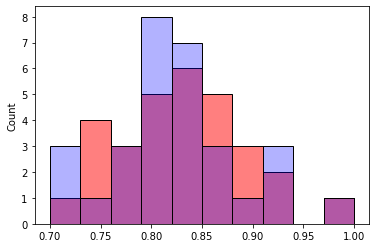

In [232]:
sns.histplot(A_group_scores, bins=10, alpha=0.5)
sns.histplot(B_group_scores, bins=10, color='blue', alpha=0.3)